In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import pandas as pd


In [12]:
datasets = ["logistic", "bank", "brca", "census", "credit"]
dataset_names = ["Simulated", "Portuguese Bank", "BRCA", "Census Income", "German Credit"]

methods = ["glm", "nn", "rf"]
method_names = ["GLM", "Neural Net", "RF"]
cvshap_methods = ["Indep, SS", "Indep, KSHAP", "Dep, SS", "Dep, KSHAP"]
num_most_important = 5


### Ranking Changes of ControlSHAP, using KernelSHAP with Dependent Features. NN on Credit Dataset.

In [13]:
def calc_num_pairs(n):
    return n*(n-1)/2
fname = '../Results/credit_nn'
# #pts x #iters x #outputs x #features
kshaps_indep = np.array(np.load(fname+'_kshap_indep.npy'))
sss_indep = np.array(np.load(fname+'_ss_indep.npy'))
kshaps_dep = np.array(np.load(fname+'_kshap_dep.npy'))
sss_dep = np.array(np.load(fname+'_ss_dep.npy'))

n_pts, nsim_per_point, h, d = kshaps_indep.shape

ss_rank_cors_indep = np.empty(n_pts)
kshap_rank_cors_indep = np.empty(n_pts)

ss_cv_rank_cors_indep = np.empty(n_pts)
kshap_cv_rank_cors_indep = np.empty(n_pts)

ss_rank_cors_dep = np.empty(n_pts)
kshap_rank_cors_dep = np.empty(n_pts)

ss_cv_rank_cors_dep = np.empty(n_pts)
kshap_cv_rank_cors_dep = np.empty(n_pts)
n_pairs = calc_num_pairs(nsim_per_point)

for i in range(n_pts):
    rankmat = np.array([rankdata(kshaps_dep[i][j][0]) for j in range(nsim_per_point)])
    kshap_rank_cors_dep[i] = np.sum(np.abs(rankmat[:,None,:]-rankmat[None,:,:]))/n_pairs

    rankmat = np.array([rankdata(kshaps_dep[i][j][6]) for j in range(nsim_per_point)])
    kshap_cv_rank_cors_dep[i] = np.sum(np.abs(rankmat[:,None,:]-rankmat[None,:,:]))/n_pairs



range(9, 95, 5)


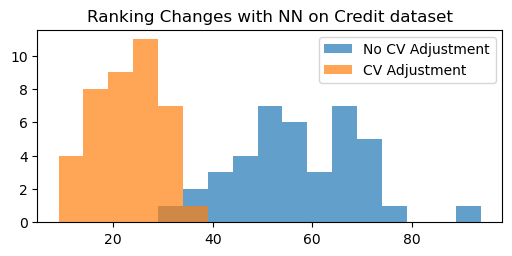

In [15]:
plt.figure(figsize=(6,2.5))
ax = plt.gca()
bins = range(round(np.min(kshap_cv_rank_cors_dep)), round(np.max(kshap_rank_cors_dep)) + 6, 5)
print(bins)
ax.hist(kshap_rank_cors_dep, alpha=.7, bins=bins)
ax.hist(kshap_cv_rank_cors_dep, alpha=.7, bins=bins)
plt.title("Ranking Changes with NN on Credit dataset")
plt.legend(["No CV Adjustment", "CV Adjustment"], loc="upper right")
plt.savefig("../PaperFigs/rank_chgs_nn_credit.png", bbox_inches='tight')
plt.show()


## Ranking Changes of each method across all datasets

GLM


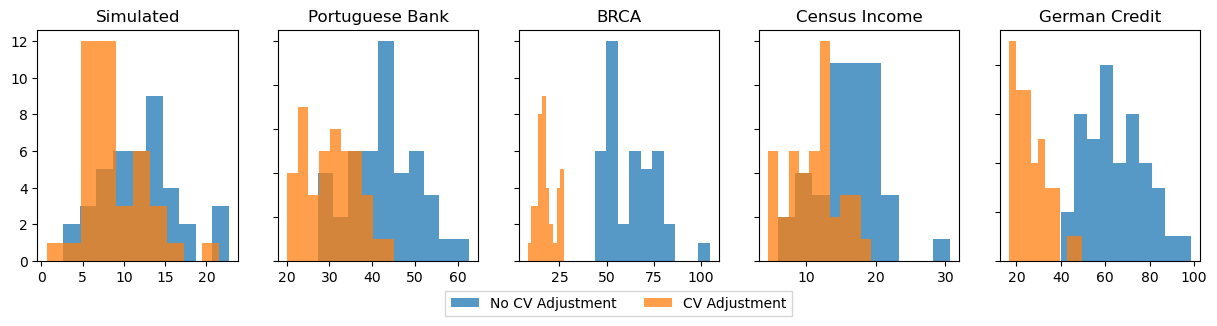

Neural Net


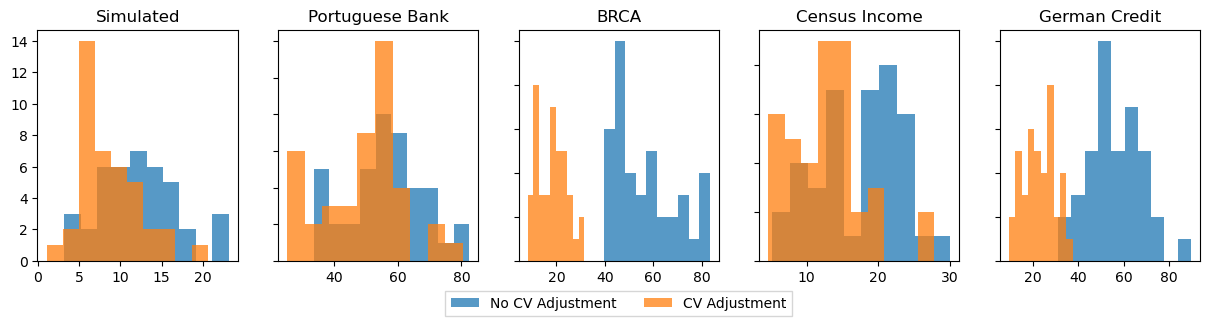

RF


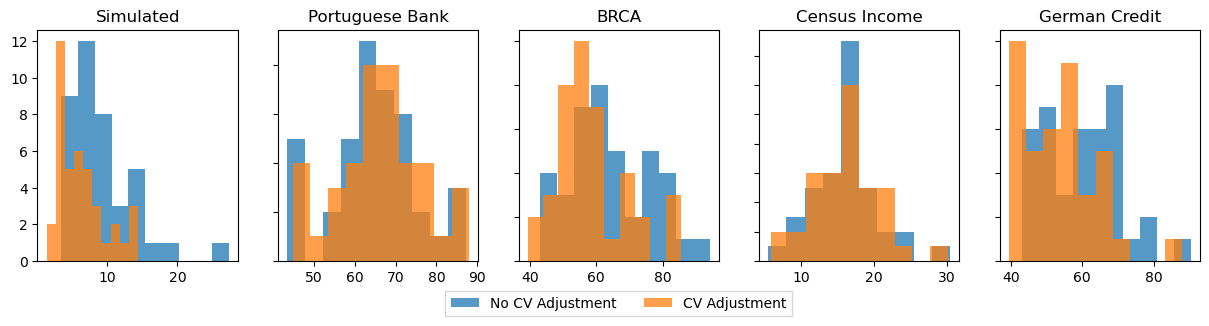

In [5]:
for i, method in enumerate(methods):
    print(method_names[i])
    fig, ax = plt.subplots(nrows=1, ncols=len(dataset_names), figsize=(15,3))
    for data_idx in range(len(dataset_names)):
        fname = '../Results/' + datasets[data_idx] + '_' + method
        kshaps_indep = np.array(np.load(fname+'_kshap_indep.npy'))
        kshaps_dep = np.array(np.load(fname+'_kshap_dep.npy'))

        n_pts, nsim_per_point, h, d = kshaps_indep.shape

        kshap_rank_cors_indep = np.empty(n_pts)
        kshap_cv_rank_cors_indep = np.empty(n_pts)
        kshap_rank_cors_dep = np.empty(n_pts)
        kshap_cv_rank_cors_dep = np.empty(n_pts)
        n_pairs = calc_num_pairs(nsim_per_point)

        for i in range(n_pts):
            rankmat = np.array([rankdata(kshaps_indep[i][j][0]) for j in range(nsim_per_point)])
            kshap_rank_cors_indep[i] = np.sum(np.abs(rankmat[:,None,:]-rankmat[None,:,:]))/n_pairs

            rankmat = np.array([rankdata(kshaps_dep[i][j][0]) for j in range(nsim_per_point)])
            kshap_rank_cors_dep[i] = np.sum(np.abs(rankmat[:,None,:]-rankmat[None,:,:]))/n_pairs

            rankmat = np.array([rankdata(kshaps_indep[i][j][6]) for j in range(nsim_per_point)])
            kshap_cv_rank_cors_indep[i] = np.sum(np.abs(rankmat[:,None,:]-rankmat[None,:,:]))/n_pairs

            rankmat = np.array([rankdata(kshaps_dep[i][j][6]) for j in range(nsim_per_point)])
            kshap_cv_rank_cors_dep[i] = np.sum(np.abs(rankmat[:,None,:]-rankmat[None,:,:]))/n_pairs

        ax[data_idx].hist(kshap_rank_cors_dep, alpha=.75)
        ax[data_idx].hist(kshap_cv_rank_cors_dep, alpha=.75)#, bins=10
        ax[data_idx].locator_params(axis='x', nbins=5)
        ax[data_idx].set_title(dataset_names[data_idx])

        if data_idx > 0:
            ax[data_idx].set_yticklabels([])
        if data_idx==2: #method_idx==0 and 
            ax[data_idx].legend(["No CV Adjustment", "CV Adjustment"], loc='upper center',
                    bbox_to_anchor=(0.5, -0.1), fancybox=False, ncol=2, fontsize=10)
    plt.savefig("../PaperFigs/rank_chgs_" + method + ".png", bbox_inches='tight')
    plt.show()
